# **Diabetes diagnosis using Nueral Network**
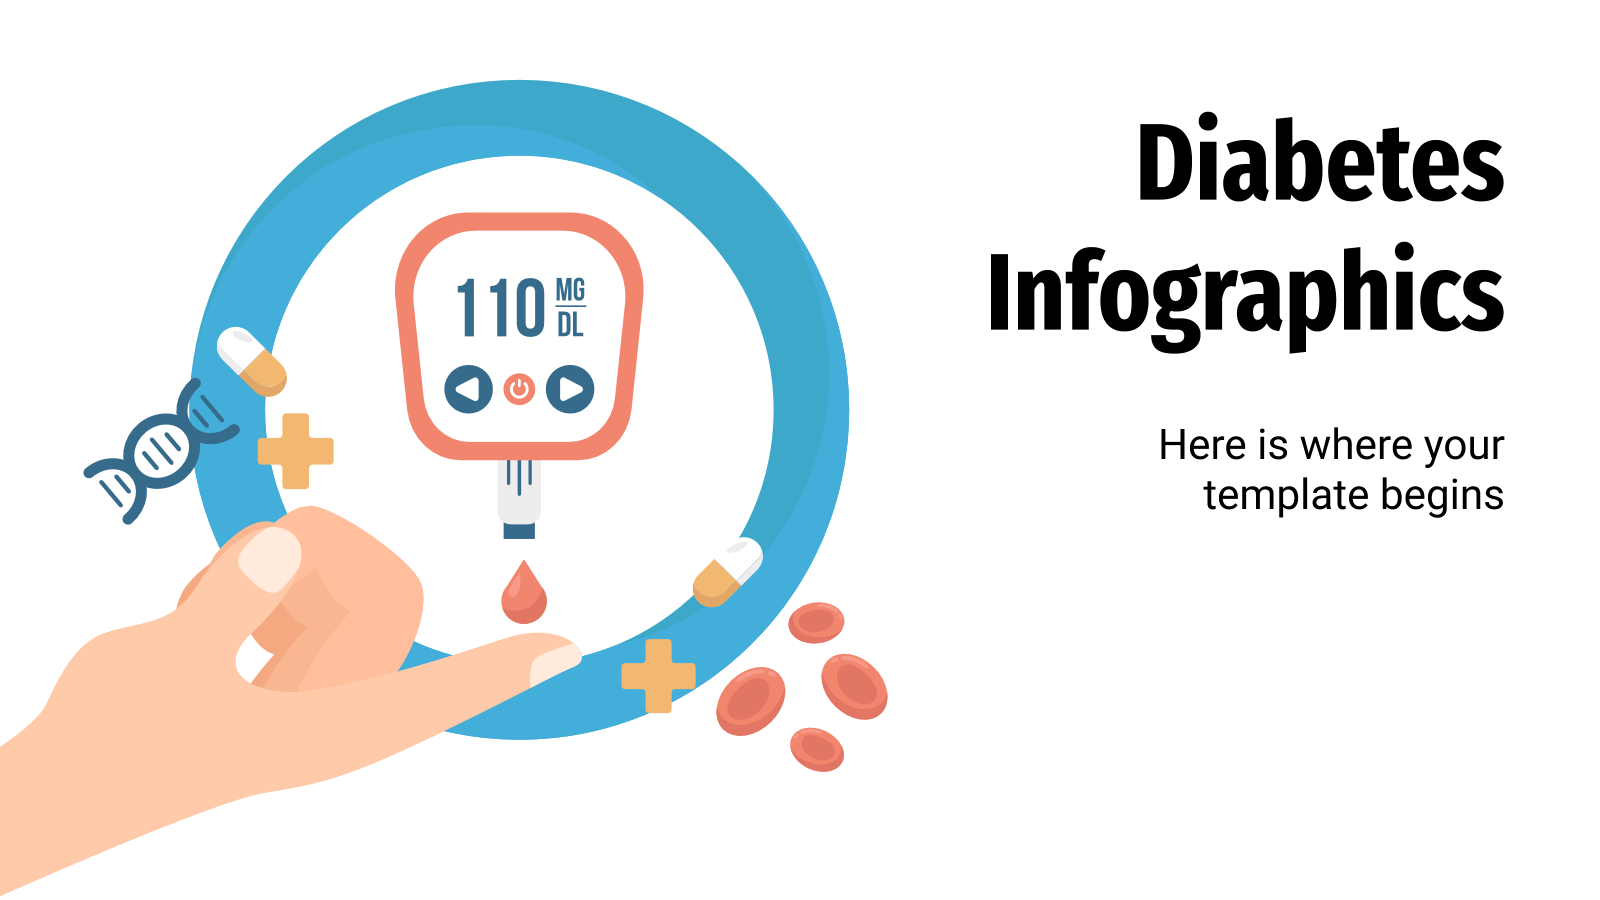
**Introduction:**

Utilizing cutting-edge neural networks, diabetes diagnosis enters a new era of precision and efficiency. By harnessing vast datasets and complex algorithms, neural networks empower clinicians to identify subtle patterns and markers for early detection. This transformative technology promises swift and accurate assessments, enhancing patient care and outcomes. It leverages advanced machine learning techniques to analyze complex data patterns and forecast the likelihood of diabetes onset. By processing diverse patient data such as demographics, medical history, and lifestyle factors, neural networks can learn and generalize predictive models.

Task Description:

In this project, a dataset that contains patient medical records of Pima Indians and whether they had an onset of diabetes within five years. Using these data, build and optimise a neural network to predict the
possibility of having diabetes.

therefore, there are two datasets:

Train.csv (Dataset)

Training data to use with model training and validation.
Number of entries: 668
Columns:
• id - Unique Id assigned to each person in the training data set
• attributes - A1 – A8
• class - 0 or 1 (1= tested positive for diabetes)

Test.csv (Dataset)

Testing data to use with predictions.
Number of entries: 100
Columns:
• id - Unique Id assigned to each person in the test data set
• attributes - A1 – A8

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import shutil
#shutil.unpack_archive('/content/drive/MyDrive/DeepLearning.zip')


Import Train Dataset.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Gurpreetpurewal/DL-and-Time-Series-NN/main/train.csv')
df.head()

id  A1   A2  A3  A4   A5    A6     A7  A8  class
0   1   6  148  72  35    0  33.6  0.627  50      1
1   2   1   85  66  29    0  26.6  0.351  31      0
2   3   8  183  64   0    0  23.3  0.672  32      1
3   4   1   89  66  23   94  28.1  0.167  21      0
4   5   0  137  40  35  168  43.1  2.288  33      1

Set all random seeds for the program either pandas, numpy or tensorflow.

In [4]:
import os
seed = 100
os.environ['PYTHON']=str(seed)
keras.utils.set_random_seed(seed)

In [5]:
df.tail()

id  A1   A2  A3  A4   A5    A6     A7  A8  class
663  664   9  145  80  46  130  37.9  0.637  40      1
664  665   6  115  60  39    0  33.7  0.245  40      1
665  666   1  112  80  45  132  34.8  0.217  24      0
666  667   4  145  82  18    0  32.5  0.235  70      1
667  668  10  111  70  27    0  27.5  0.141  40      1

df.info()- this method is used to display concise summary information about a DataFrame, including the data types of each column and memory usage.
It provides a quick overview of the DataFrame's structure, facilitating data exploration and understanding in data analysis tasks.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      668 non-null    int64  
 1   A1      668 non-null    int64  
 2   A2      668 non-null    int64  
 3   A3      668 non-null    int64  
 4   A4      668 non-null    int64  
 5   A5      668 non-null    int64  
 6   A6      668 non-null    float64
 7   A7      668 non-null    float64
 8   A8      668 non-null    int64  
 9   class   668 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 52.3 KB


df.describe()- It provides a statistical summary of a DataFrame's numerical data, offering insights into measures like mean, median, standard deviation, and quartiles.
This function is a handy tool for quickly understanding the distribution and central tendencies of data within a DataFrame, aiding in exploratory data analysis.






In [7]:
df.describe()

id          A1          A2          A3          A4          A5  \
count  668.000000  668.000000  668.000000  668.000000  668.000000  668.000000   
mean   334.500000    3.812874  120.405689   68.748503   20.567365   79.654192   
std    192.979273    3.365672   32.291473   19.526392   16.020600  115.827750   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    167.750000    1.000000   99.000000   64.000000    0.000000    0.000000   
50%    334.500000    3.000000  116.000000   72.000000   23.000000   36.500000   
75%    501.250000    6.000000  140.000000   80.000000   32.000000  126.000000   
max    668.000000   17.000000  199.000000  122.000000   99.000000  846.000000   

               A6          A7          A8       class  
count  668.000000  668.000000  668.000000  668.000000  
mean    31.860180    0.477329   33.091317    0.345808  
std      7.827111    0.341398   11.711386    0.475988  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.100000    0.238750   24.000000    0.000000  
50%     32.000000    0.377000   29.000000    0.000000  
75%     36.500000    0.641250   40.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

In [8]:
# To check the null values
df.isnull().sum()

id       0
A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
class    0
dtype: int64

Using seaborn's countplot,it help to Visualize the distribution of class.

<Axes: xlabel='class', ylabel='count'>

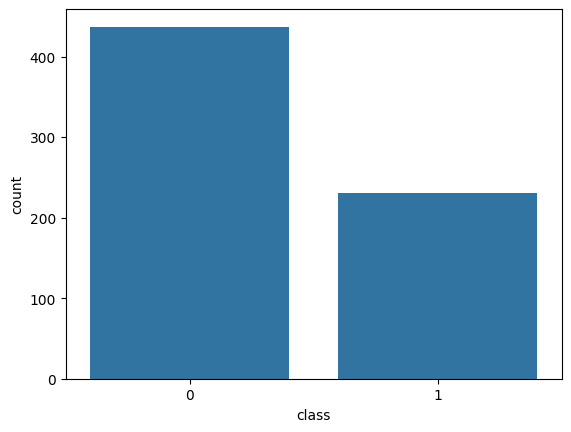

In [9]:
# Summarise class details
sns.countplot(x=df['class'])


**Diabetes Diagnosis distribution**

Using class labels the plot displays,

*   Diagnosis distribution.
*   Mapping zeros to "Negative Diabetes" and ones to "Positive Diabetes".
*   Visualizing counts, unveiling health condition trends.

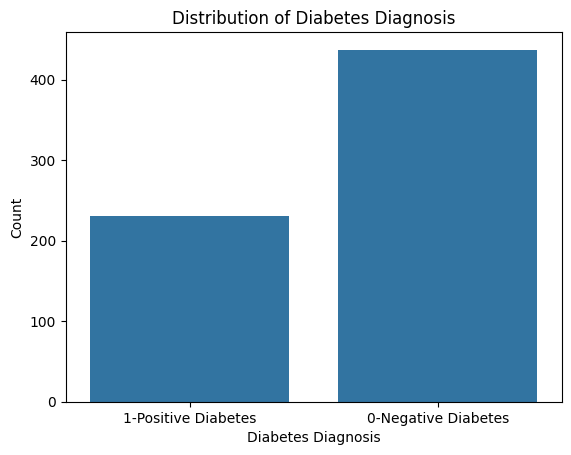

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'class' column contains values 0 and 1 for negative and positive diabetes respectively
class_labels = {0: '0-Negative Diabetes', 1: '1-Positive Diabetes'}

# Replace the numeric values with their corresponding labels
df['class_label'] = df['class'].map(class_labels)
# Plotting the countplot with modified labels
sns.countplot(x=df['class_label'])
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Diagnosis')
plt.show()

In [11]:
df['class_label'].head()

0    1-Positive Diabetes
1    0-Negative Diabetes
2    1-Positive Diabetes
3    0-Negative Diabetes
4    1-Positive Diabetes
Name: class_label, dtype: object

The code snippet drops columns 'id', 'class', and 'class_label' from the DataFrame 'df' to prepare the training data.

After removing these columns, the first few rows of the modified DataFrame are displayed using the .head() method.

This operation is often a preliminary step in machine learning tasks to separate features from target labels

In [12]:
x_train= df.drop(['id', 'class','class_label'], axis=1)
x_train.head()

A1   A2  A3  A4   A5    A6     A7  A8
0   6  148  72  35    0  33.6  0.627  50
1   1   85  66  29    0  26.6  0.351  31
2   8  183  64   0    0  23.3  0.672  32
3   1   89  66  23   94  28.1  0.167  21
4   0  137  40  35  168  43.1  2.288  33

It extract the 'class' column from 'df' and store it in variable 'y'. Then, the info() method provides information about 'y', such as data type and non-null counts.

In [13]:
y = df['class']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 668 entries, 0 to 667
Series name: class
Non-Null Count  Dtype
--------------  -----
668 non-null    int64
dtypes: int64(1)
memory usage: 5.3 KB



Splitting the data into train and validation sets:

*   test size of 0.3, random_state=100.
*   training dataset sizes to check, before we delve.
*   Ensuring our models train and validate well.

In [14]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(x_train, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train1)}')
print(f'validation data set size: {len(X_val1)}')

training data set size: 467
validation data set size: 201



**Keras Model:**

Importing some libraries using keras model;

*   In a Sequential model, complexity ascends.
*   With Dense layers, activation 'relu' amends.
*   Input dimension set to eight, a tailored fit.
*   Batch normalization, to stabilize, it commits.

Furthermore,

Dropout regularization, a shield from overfitting's might,

Another layer, thirty-two nodes ignite.

Once more, BatchNormalization, its steadying role,

Summary reveals a single output, sigmoid's goal.

In [15]:
# define the keras model
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))  # Increased complexity
model.add(BatchNormalization())                       # Batch normalization
model.add(Dropout(0.5))                               # Dropout regularization
model.add(Dense(32, activation='relu'))               # Increased complexity
model.add(BatchNormalization())                       # Batch normalization
model.add(Dropout(0.5))                               # Dropout regularization
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32)                0


Using Keras metrics Precision and Recall, the model is configured to optimize binary cross-entropy loss with Adam optimizer, striving for accuracy alongside precise positive predictions and comprehensive recall performance.

In [16]:
# compile the keras model
from keras.metrics import Precision, Recall
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy', Precision(), Recall()])

The model is trained on X_train1 and y_train1 data for 60 epochs with a batch size of 50, while monitoring the validation performance on X_val1 and y_val1 datasets.

In [17]:
# train model
model.fit(X_train1, y_train1, batch_size=50, epochs=60, validation_data=(X_val1, y_val1))

Epoch 1/60
10/10 [==============================] - 2s 60ms/step - loss: 0.9380 - accuracy: 0.5632 - precision: 0.4000 - recall: 0.5185 - val_loss: 3.2357 - val_accuracy: 0.3433 - val_precision: 0.3433 - val_recall: 1.0000
Epoch 2/60
10/10 [==============================] - 0s 9ms/step - loss: 0.7909 - accuracy: 0.6124 - precision: 0.4523 - recall: 0.5556 - val_loss: 2.7539 - val_accuracy: 0.3483 - val_precision: 0.3450 - val_recall: 1.0000
Epoch 3/60
10/10 [==============================] - 0s 9ms/step - loss: 0.8465 - accuracy: 0.6124 - precision: 0.4475 - recall: 0.5000 - val_loss: 2.5134 - val_accuracy: 0.3483 - val_precision: 0.3450 - val_recall: 1.0000
Epoch 4/60
10/10 [==============================] - 0s 10ms/step - loss: 0.8897 - accuracy: 0.6039 - precision: 0.4378 - recall: 0.5000 - val_loss: 2.2807 - val_accuracy: 0.3532 - val_precision: 0.3467 - val_recall: 1.0000
Epoch 5/60
10/10 [==============================] - 0s 8ms/step - loss: 0.7995 - accuracy: 0.5889 - precision:

Get model predictions.

In [18]:
y_pred1 = model.predict(X_val1)
print(y_pred1[:10])

7/7 [==============================] - 0s 2ms/step
[[0.1231411 ]
 [0.41314036]
 [0.12815513]
 [0.1640857 ]
 [0.70692736]
 [0.0739981 ]
 [0.74067885]
 [0.18740895]
 [0.40902773]
 [0.11067136]]



The first line converts predicted probabilities in y_pred1 to categorical values, labeling them as 1 if the probability is greater than 0.5, otherwise 0.

In [19]:
y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in y_pred1]
print(y_pred_categorical1[:10])

[0, 0, 0, 0, 1, 0, 1, 0, 0, 0]


Calculate the accuracy score using sklearn's metrics module:
Print the accuracy score.

In [20]:
# measure accuracy
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(y_val1, y_pred_categorical1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7860696517412935


**Test Dataset:**

Importing test dataset and summarise the details.

In [21]:
dt = pd.read_csv('https://raw.githubusercontent.com/Gurpreetpurewal/DL-and-Time-Series-NN/main/test.csv')

# summarise the details
print(f'Number of entries: {len(dt)}')

X_test = dt.drop(['id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


Using the model, predictions are made on the test data, printing the results. Then, these predictions are converted into categorical values and encoded for further analysis.

In [22]:
test_pred = model.predict(X_test)
print(test_pred)

test_pred_categorical = [1 if pred > 0.5 else 0 for pred in test_pred]
print(test_pred_categorical)
le = LabelEncoder()

test_pred_encoded = le.fit_transform(test_pred_categorical)
print(test_pred_encoded)

4/4 [==============================] - 0s 3ms/step
[[0.28276536]
 [0.5301756 ]
 [0.69129926]
 [0.12521918]
 [0.14625098]
 [0.6336472 ]
 [0.17028703]
 [0.74229306]
 [0.3950107 ]
 [0.15212242]
 [0.36277518]
 [0.1759105 ]
 [0.03121301]
 [0.71353716]
 [0.20096263]
 [0.31555068]
 [0.14335087]
 [0.39861095]
 [0.28944403]
 [0.1753703 ]
 [0.37052345]
 [0.69563454]
 [0.18153782]
 [0.57814807]
 [0.32294595]
 [0.5177518 ]
 [0.08940824]
 [0.47093782]
 [0.57944506]
 [0.12510885]
 [0.35821953]
 [0.38873798]
 [0.38017234]
 [0.27453023]
 [0.6052801 ]
 [0.52933604]
 [0.17206566]
 [0.14527503]
 [0.09916594]
 [0.35674983]
 [0.54427737]
 [0.19559535]
 [0.5107932 ]
 [0.2817947 ]
 [0.48739243]
 [0.33635575]
 [0.16726397]
 [0.7896894 ]
 [0.7444974 ]
 [0.1241303 ]
 [0.28177088]
 [0.19348674]
 [0.08091841]
 [0.33775315]
 [0.48467204]
 [0.37630978]
 [0.20373327]
 [0.3007873 ]
 [0.33049604]
 [0.37845543]
 [0.5226035 ]
 [0.13169037]
 [0.28137335]
 [0.2797708 ]
 [0.75027347]
 [0.18424726]
 [0.14632568]
 [0.1588908

Assigning predictions to a column in the DataFrame dt.

Extracting id and prediction columns.

Writing the extracted data to a CSV file for submission.


In [23]:
dt['prediction'] = test_pred_encoded

extration = dt[['id','prediction']]
extration.to_csv('submision.csv', index=False)

In [24]:
import json

import pandas as pd


dt = dt[["id", "prediction"]]

data = []
for index, row in dt.iterrows():

 # Converting values to built-in types
    data.append({'id': int(row['id']), 'prediction': float(row['prediction'])})
print(data[0:5])

submission_file_path = "submission.json"

with open(submission_file_path, 'w') as fp:
    json.dump(data, fp)


[{'id': 1, 'prediction': 0.0}, {'id': 2, 'prediction': 1.0}, {'id': 3, 'prediction': 1.0}, {'id': 4, 'prediction': 0.0}, {'id': 5, 'prediction': 0.0}]
